In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
BASE_DIR = '/content/drive/MyDrive/cv_project_fall_2022/'
sys.path.append(BASE_DIR)

In [3]:
import os
import torch
from torch.utils.data import DataLoader

import utils.utils as utils
from models.definitions.transformer_net_new import TransformerNet

import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

In [4]:
def stylize_static_image(inference_config):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Prepare the model - load the weights and put the model into evaluation mode
    stylization_model = TransformerNet().to(device)
    model_saved_path = inference_config['model_saved_path']
    training_state = torch.load(model_saved_path)
    state_dict = training_state["state_dict"]
    stylization_model.load_state_dict(state_dict, strict=True)
    stylization_model.eval()

    if inference_config['verbose']:
        utils.print_model_metadata(training_state)

    content_img_path = inference_config['content_images_path']
    print(content_img_path)
    content_image_to_show = Image.open(content_img_path)
    plt.imshow(content_image_to_show)
    plt.show()

    

    with torch.no_grad():
        transform_list = [transforms.ToTensor()]
        transform = transforms.Compose(transform_list)
        
        target_transform_list = [transforms.ToTensor()]
        #target_transform_list = [transforms.ToTensor(), transforms.GaussianBlur(kernel_size=(51, 51), sigma=(70, 70))]
        transform_target = transforms.Compose(target_transform_list)
        
        img = utils.load_image(content_img_path, target_shape=inference_config['img_width'])
        img = transform(img).to(device)

        face_masked_image_batch = utils.load_image(inference_config['content_images_mask_path'], target_shape=inference_config['img_width'], RGB=False)
        face_masked_image_batch = transform_target(face_masked_image_batch).to(device)
        face_masked_image_batch = face_masked_image_batch * 0.03

        result = torch.cat([img, face_masked_image_batch], dim=0)

        print(' Infering...')
        print(img.shape)
        content_image = result.repeat(1, 1, 1, 1)
        print(content_image.shape)
        print(' Infering Ends...')
        stylized_img = stylization_model(content_image).to('cpu').numpy()[0]
        utils.save_and_maybe_display_image(inference_config, stylized_img, should_display=inference_config['display'])


Style Image :


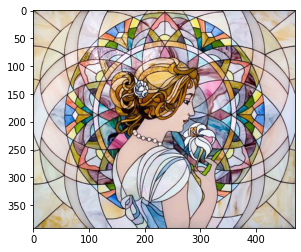

Style Image for Face:


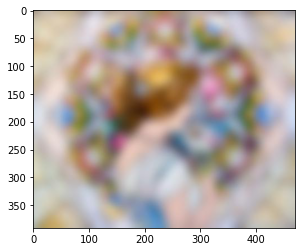

Mask Path :  /content/drive/MyDrive/cv_project_fall_2022/test-images/masks/19_Couple_Couple_19_940.jpg
Model training metadata:
content_weight : 1.0
style_weight : 400000.0
tv_weight : 0
num_of_datapoints : 1000
/content/drive/MyDrive/cv_project_fall_2022/test-images/images/19_Couple_Couple_19_940.jpg


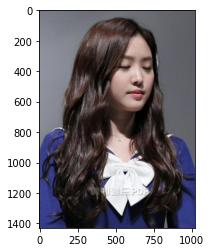

 Infering...
torch.Size([3, 697, 500])
torch.Size([1, 4, 697, 500])
 Infering Ends...
Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


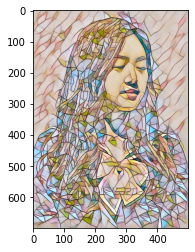

Mask Path :  /content/drive/MyDrive/cv_project_fall_2022/test-images/masks/8_Election_Campain_Election_Campaign_8_138.jpg
Model training metadata:
content_weight : 1.0
style_weight : 400000.0
tv_weight : 0
num_of_datapoints : 1000
/content/drive/MyDrive/cv_project_fall_2022/test-images/images/8_Election_Campain_Election_Campaign_8_138.jpg


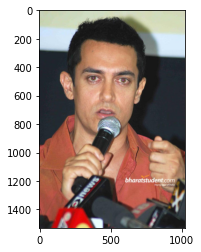

 Infering...
torch.Size([3, 747, 500])
torch.Size([1, 4, 747, 500])
 Infering Ends...
Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


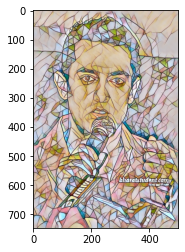

Mask Path :  /content/drive/MyDrive/cv_project_fall_2022/test-images/masks/0_Parade_marchingband_1_1031.jpg
Model training metadata:
content_weight : 1.0
style_weight : 400000.0
tv_weight : 0
num_of_datapoints : 1000
/content/drive/MyDrive/cv_project_fall_2022/test-images/images/0_Parade_marchingband_1_1031.jpg


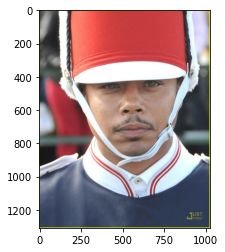

 Infering...
torch.Size([3, 639, 500])
torch.Size([1, 4, 639, 500])
 Infering Ends...
Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


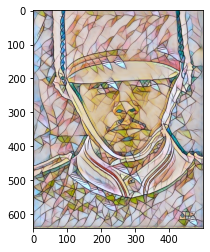

Mask Path :  /content/drive/MyDrive/cv_project_fall_2022/test-images/masks/0_Parade_Parade_0_904.jpg
Model training metadata:
content_weight : 1.0
style_weight : 400000.0
tv_weight : 0
num_of_datapoints : 1000
/content/drive/MyDrive/cv_project_fall_2022/test-images/images/0_Parade_Parade_0_904.jpg


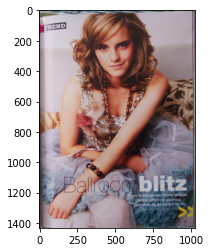

 Infering...
torch.Size([3, 699, 500])
torch.Size([1, 4, 699, 500])
 Infering Ends...
Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


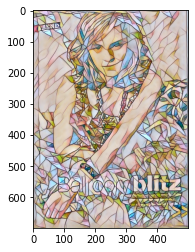

Mask Path :  /content/drive/MyDrive/cv_project_fall_2022/test-images/masks/9_Press_Conference_Press_Conference_9_73.jpg
Model training metadata:
content_weight : 1.0
style_weight : 400000.0
tv_weight : 0
num_of_datapoints : 1000
/content/drive/MyDrive/cv_project_fall_2022/test-images/images/9_Press_Conference_Press_Conference_9_73.jpg


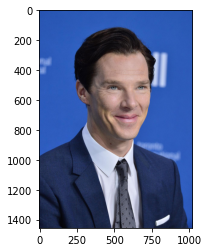

 Infering...
torch.Size([3, 710, 500])
torch.Size([1, 4, 710, 500])
 Infering Ends...
Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


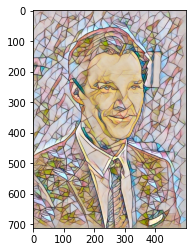

In [5]:
inference_config = dict()

# Content image(s) to stylize
inference_config['content_input'] = 'lion.jpg'
# Resize content image to this width
inference_config['img_width'] = 500
# Set to True to print Model Information
inference_config['verbose'] = True
# Display Result 
inference_config['display'] = True
# Output Images Path 
inference_config['redirected_output'] = os.path.join(BASE_DIR, 'data', 'output-images')
# Style Image Path
inference_config['style_images_path'] = os.path.join(BASE_DIR, 'data', 'style-images')


'''Mosaic'''
# Style image name that will be used for Styling the Image
inference_config['style_img_name'] = 'mosaic.jpg'
# Style image name that will be used for Styling Face
inference_config['face_style_img_name'] = 'mosaic-blurred.jpg'
# Style Transfer on Face using blurred Style Image + Edge Loss
inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/mosaic/ckpt_style_face_edge_only_new_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'

'''Edtaonist'''
# # Style image name that will be used for Styling the Image
# inference_config['style_img_name'] = 'edtaonisl.jpg'
# # Style image name that will be used for Styling Face
# inference_config['face_style_img_name'] = 'edtaonisl-blurred.jpg'
# # Style Transfer on Face using blurred Style Image + Edge Loss
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/edtaonisl/edtaonisl-blurred-style-image-mask_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'

''' Checkpints from experiments'''
# # 1st conv layer
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/edtaonisl/ckpt_style_face_content_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_9_batch_1899.pth'
# # 2nd conv layer
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/edtaonisl/ckpt_style_face_1st_layer_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'
# # 3rd conv layer
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/edtaonisl/ckpt_style_face_content_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'
# # 2nd conv layer - using content and style loss of layer 2
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/ckpt_style_face_layer_2_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'
# # Depth and Face Edge - Final
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/mosaic/ckpt_style_depth_face_edge_layer_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'
# # Face Edge Only Mosaic
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/mosaic/ckpt_style_face_edge_only_new_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_6_batch_1899.pth'
# # Face Edge Only - Final
# inference_config['model_saved_path'] = BASE_DIR + 'models/checkpoints/mosaic/ckpt_style_face_edge_only_ldc_pre_mask_new_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_9_batch_1899.pth'



os.makedirs(inference_config['redirected_output'], exist_ok=True)
test_images_path = BASE_DIR + 'test-images/images/'
mask_test_images_path = BASE_DIR + 'test-images/masks/'

all_test_images = os.listdir(test_images_path)


# Show style Image
style_image = os.path.join(inference_config['style_images_path'], inference_config['style_img_name'])
style_image_to_show = Image.open(style_image)
print("Style Image :")
plt.imshow(style_image_to_show)
plt.show()

# Show Style Image for Face
face_style_image = os.path.join(inference_config['style_images_path'], inference_config['face_style_img_name'])
face_style_iamge_to_show = Image.open(face_style_image)
print("Style Image for Face:")
plt.imshow(face_style_iamge_to_show)
plt.show()

for test_image in all_test_images:
    inference_config['content_images_path'] = test_images_path + test_image
    inference_config['content_images_mask_path'] = mask_test_images_path + test_image
    print("Mask Path : ",inference_config['content_images_mask_path'])
    stylize_static_image(inference_config)

